In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
project_list_file = 'ProjectListExport_2022-05-20-09-13-56-082.xls'
cft_list_file = 'CFTListExport_2022-05-20-09-10-10-246.xls'
prweb_file = 'New Production Status Summary 2022-05-24.xlsx'
start_from = '2022-05'

In [3]:
project = pd.read_excel(project_list_file, usecols=[0,1,3,4,5,6,9,10], parse_dates=[2,3,4,5], index_col=[0])
cft = pd.read_excel(cft_list_file, usecols=[0,44], index_col=[0])

c:\Users\wangcooper\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
cft

,Develop Product QE (DPQE)
Project ID,
13939,"Kuo, Chris"
15274,"Kuo, Chris"
15624,"Lo, Aalto"
13009,"Kuo, Chris"
14984,"Kuo, Chris"
...,...
7141,"Wang, Cooper"
2358,NaN
2542,NaN


In [5]:
project = project[(project['Global/Asia'] == 'Global') & (project['PDP/Form107'] == 'PDP')]

In [6]:
project_cft = pd.merge(left=project, right=cft, left_index=True, right_index=True)
project_cft.sort_index()

,Project Name,Working Prototype Built and Tested,Final Factory Prototypes Built,MP Date,PR Date,Global/Asia,PDP/Form107,Develop Product QE (DPQE)
Project ID,,,,,,,,
2854,Product - GDC 7500,2013-04-30,NaT,2019-07-01,2018-10-12,Global,PDP,"Kuo, Chris"
2914,Product - GTN 6xx/7xx,NaT,NaT,NaT,NaT,Global,PDP,NaN
2930,Product - GWX 7000,2019-03-22,NaT,2021-09-09,2021-06-04,Global,PDP,NaN
3753,Product - GDU 7XX,2015-08-14,NaT,2018-01-26,2017-01-05,Global,PDP,NaN
3767,HIRF & Lightning System Cert,NaT,NaT,NaT,NaT,Global,PDP,NaN
...,...,...,...,...,...,...,...,...
16449,"GCU 485, Gray, 3 Button",NaT,NaT,NaT,NaT,Global,PDP,NaN
16455,STC - GTN Xi GDL 60 Installation,NaT,NaT,NaT,NaT,Global,PDP,NaN
16456,Descent T2 Transceiver,NaT,NaT,NaT,NaT,Global,PDP,NaN


In [7]:
consumer_dpqe_list = ['Lo, Aalto','Kuo, Chris','Wang, Cooper', 'Fu, Ernest','Fu, Ernest;\nLo, Aalto','Hsu, Jason(PQE)','Ni, Wendy']

In [8]:
df_consumer_dpqe = project_cft[project_cft['Develop  Product QE (DPQE)'].isin(consumer_dpqe_list)].sort_index()
df_consumer_dpqe

,Project Name,Working Prototype Built and Tested,Final Factory Prototypes Built,MP Date,PR Date,Global/Asia,PDP/Form107,Develop Product QE (DPQE)
Project ID,,,,,,,,
2854,Product - GDC 7500,2013-04-30,NaT,2019-07-01,2018-10-12,Global,PDP,"Kuo, Chris"
5711,Product - GLA 85,2014-10-30,NaT,2018-12-07,2016-08-31,Global,PDP,"Kuo, Chris"
7011,Xero G1(s) SatCom Scouting Camera,2020-03-03,2020-11-09,2022-05-25,2021-08-27,Global,PDP,"Kuo, Chris"
7029,Alpha Dog Collar,2021-11-18,2022-07-11,2022-11-08,2022-09-27,Global,PDP,"Kuo, Chris"
7563,Mercury,NaT,NaT,2022-01-17,2021-04-23,Global,PDP,"Fu, Ernest"
...,...,...,...,...,...,...,...,...
16069,zumo XT2,2022-05-11,2022-08-26,2023-01-30,2022-11-21,Global,PDP,"Ni, Wendy"
16108,fenix 7S Pro,2022-07-15,2022-07-08,2022-12-19,2022-10-18,Global,PDP,"Wang, Cooper"
16112,fenix 7X Pro,2022-05-18,2022-07-08,2022-12-19,2022-10-18,Global,PDP,"Wang, Cooper"


In [9]:
value_vars = ['Working Prototype Built and Tested','Final Factory Prototypes Built','PR Date','MP Date']

melted = df_consumer_dpqe.reset_index().melt(id_vars= ['Project ID','Project Name','Develop  Product QE (DPQE)'],value_vars=value_vars)
melted

,Project ID,Project Name,Develop Product QE (DPQE),variable,value
0,2854,Product - GDC 7500,"Kuo, Chris",Working Prototype Built and Tested,2013-04-30
1,5711,Product - GLA 85,"Kuo, Chris",Working Prototype Built and Tested,2014-10-30
2,7011,Xero G1(s) SatCom Scouting Camera,"Kuo, Chris",Working Prototype Built and Tested,2020-03-03
3,7029,Alpha Dog Collar,"Kuo, Chris",Working Prototype Built and Tested,2021-11-18
4,7563,Mercury,"Fu, Ernest",Working Prototype Built and Tested,NaT
...,...,...,...,...,...
371,16069,zumo XT2,"Ni, Wendy",MP Date,2023-01-30
372,16108,fenix 7S Pro,"Wang, Cooper",MP Date,2022-12-19
373,16112,fenix 7X Pro,"Wang, Cooper",MP Date,2022-12-19
374,16205,Descent Mk3s,"Wang, Cooper",MP Date,2023-09-18


In [10]:
melted.rename(columns={'Develop  Product QE (DPQE)':'DPQE','variable':'Phase','value':'Date'},inplace=True)

In [11]:
melted.Date = melted.Date.dt.strftime('%Y-%m')

In [12]:
melted = melted[melted.Date > start_from]

In [13]:
melted.isnull().sum()

Project ID      0
Project Name    0
DPQE            0
Phase           0
Date            0
dtype: int64

In [14]:
# Weight socre, WP MP = 1, FP = 2, PR = 3
melted['weighted_score'] = melted.loc[:,'Phase'].apply(lambda phase : 1 if (phase == 'Working Prototype Built and Tested') | (phase == 'MP Date') else 2 if phase=='Final Factory Prototypes Built' else 3 if phase=='PR Date' else 0)

<ipython-input-14-b81977dc1734>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melted['weighted_score'] = melted.loc[:,'Phase'].apply(lambda phase : 1 if (phase == 'Working Prototype Built and Tested') | (phase == 'MP Date') else 2 if phase=='Final Factory Prototypes Built' else 3 if phase=='PR Date' else 0)


In [38]:
melted.rename(columns={"Project ID":'PM Project Id','Project Name':'PM Project Name'}, inplace=True)

c:\Users\wangcooper\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [50]:
prweb = pd.read_excel(prweb_file, header=1, usecols=[0,3])

In [51]:
prweb

,Project Name,PM Project Id
0,Xero B60i Laser Navigation Binoculars,13229
1,LED Control Module,13134
2,Descent Mk3 Series - Small,12994
3,Descent Mk3 Series - Large,12994
4,IMWW23,14434
...,...,...
153,"Product - 1.3\"" GTR/GNC",12164
154,eTrex Solar,10901
155,Pet Tracker,10666
156,DGCN20,10620


In [42]:
#prweb_pmsystem = pd.merge(left=prweb, right=melted, how='left', left_on='PM Project Id', right_on='PM Project Id', suffixes=['_prweb','_PMsystem'])

In [52]:
prweb_pmsystem = pd.merge(left=melted, right=prweb, how='left', left_on='PM Project Id', right_on='PM Project Id', suffixes=['_PMsystem','_prweb'])

In [75]:
prweb_pmsystem.head()

,PM Project Id,PM Project Name,DPQE,Phase,Date,weighted_score,Project Name
0,9946,GPSMAP 9000,"Hsu, Jason(PQE)",Working Prototype Built and Tested,2022-06,1,"GPSMAP 9000 - 19"""
1,9946,GPSMAP 9000,"Hsu, Jason(PQE)",Working Prototype Built and Tested,2022-06,1,"GPSMAP 9000 - 24"""
2,9946,GPSMAP 9000,"Hsu, Jason(PQE)",Working Prototype Built and Tested,2022-06,1,"GPSMAP 9000 -27"""
3,9946,GPSMAP 9000,"Hsu, Jason(PQE)",Working Prototype Built and Tested,2022-06,1,"GPSMAP 9000 - 22"""
4,9946,GPSMAP 9000,"Hsu, Jason(PQE)",Working Prototype Built and Tested,2022-06,1,GPSMAP 9000_Black Box


In [77]:
prweb_pmsystem.groupby(['DPQE','Project Name','Date']).sum()['weighted_score'].sort_index(level='Date').unstack().to_excel('prweb_pmsystem_weighted.xlsx')

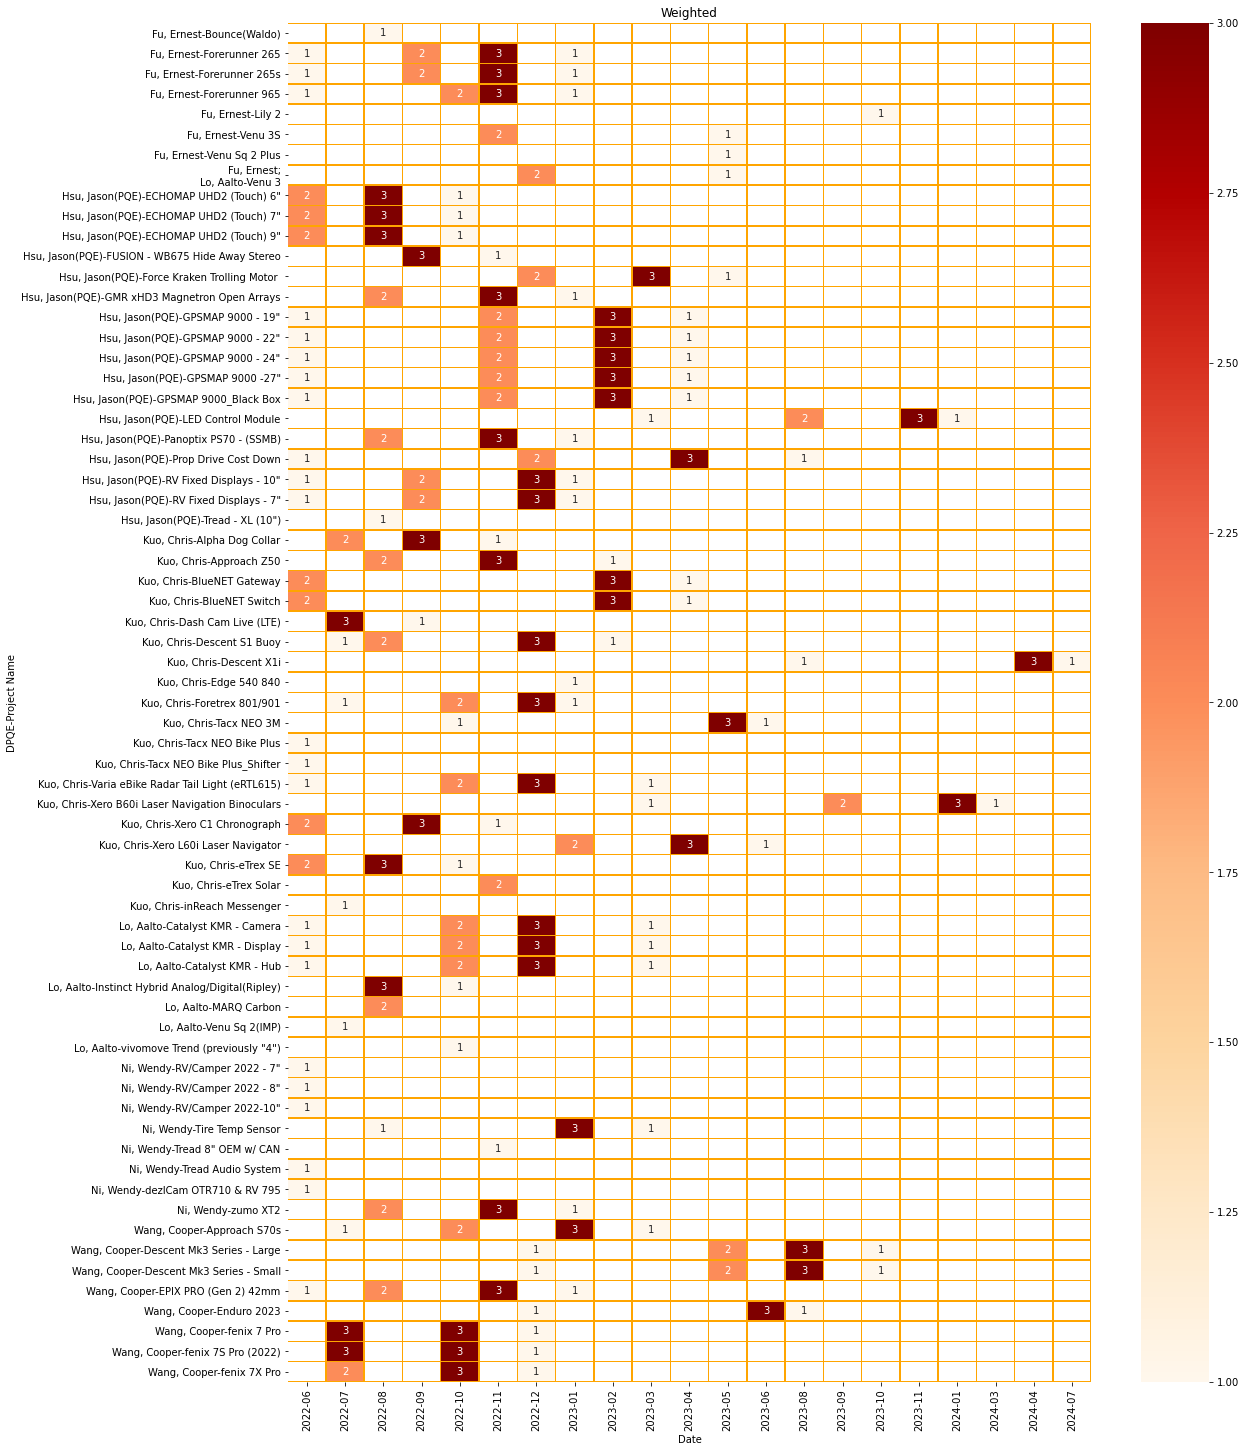

In [68]:
plt.figure(figsize=(18,25))
sns.heatmap(prweb_pmsystem.groupby(['DPQE','Project Name','Date']).sum()['weighted_score'].sort_index(level='Date').unstack(), cmap="OrRd", annot=True,linewidths=0.5, linecolor='orange').set_title('Weighted');

In [ ]:

#for member in consumer_dpqe_list:
#    plt.figure(figsize=(13,10))
#    sns.heatmap(final.groupby(['DPQE','Project Name','Date']).sum()['Project_Qty_in_PRweb'].unstack(fill_value=0).loc[member],cmap="OrRd", annot=True).set(title=member+'_Project_Qty_in_PRweb');